<h1>Advanced Data Science Capstone Project - EUR/USD Prediction Model</h1>

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d957dcffc6fa47cbbc3bb5b958fec52b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_PNJHCR3xhZTpljLQWCrLfrXNuYf16wpVLZjMb9a2Edf',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d957dcffc6fa47cbbc3bb5b958fec52b.get_object(Bucket='courseraadvdatasciencecapstone-donotdelete-pr-e5jfsn1v0dd13m',Key='EURUSD_Q1dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.

df_EURUSD = pd.read_csv(body)
df_EURUSD.head()

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2020.01.02 06:00:00,1.1214,1.1212,1.1213,1.1214
1,2020.01.02 06:15:00,1.1214,1.1212,1.1214,1.1212
2,2020.01.02 06:30:00,1.1212,1.1209,1.1212,1.1209
3,2020.01.02 06:45:00,1.1210,1.1201,1.1209,1.1201
4,2020.01.02 07:00:00,1.1203,1.1201,1.1201,1.1201


In [68]:
df_EURUSD = df_EURUSD[df_EURUSD.CLOSE != "."]
print(df_EURUSD.shape)
df_EURUSD.head(20)

(5277, 5)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2020.01.02 06:00:00,1.1214,1.1212,1.1213,1.1214
1,2020.01.02 06:15:00,1.1214,1.1212,1.1214,1.1212
2,2020.01.02 06:30:00,1.1212,1.1209,1.1212,1.1209
3,2020.01.02 06:45:00,1.1210,1.1201,1.1209,1.1201
4,2020.01.02 07:00:00,1.1203,1.1201,1.1201,1.1201
5,2020.01.02 07:15:00,1.1203,1.1201,1.1201,1.1202
6,2020.01.02 07:30:00,1.1203,1.1201,1.1202,1.1203
7,2020.01.02 07:45:00,1.1204,1.1202,1.1203,1.1204
8,2020.01.02 08:00:00,1.1207,1.1204,1.1204,1.1207
9,2020.01.02 08:15:00,1.1207,1.1204,1.1207,1.1205


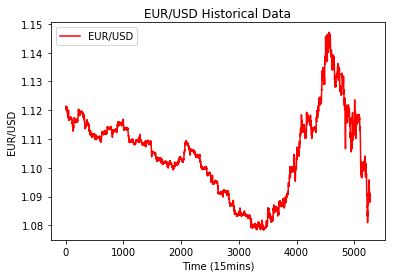

In [44]:
import matplotlib.pyplot as plt
df_EURUSD_plot = df_EURUSD.iloc[:,1:2].values.astype(float)
# Visualising the Data
plt.plot(df_EURUSD.CLOSE, color = 'red', label = 'EUR/USD')
plt.title('EUR/USD Historical Data')
plt.xlabel('Time (15mins)')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [4]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

Using TensorFlow backend.


In [5]:
# defining the batch size and number of epochs
# make sure the timesteps is well within the number of entries in the dataset
# may need to reduce the no of epochs at later stage
batch_size = 64
epochs = 15
timesteps = 20

<h1>Batch-size and trainings-set size</h1> <body>With stateful LSTMs the trainings-set size must be divisible without remainder by the batch-size (modulo = 0)</body>

In [6]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [7]:
length = get_train_length(df_EURUSD, batch_size, 0.1)
print(length)

4672
4736
4736


In [8]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_EURUSD_train = df_EURUSD[0:upper_train]
training_set = df_EURUSD_train.iloc[:,1:2].values
training_set.shape

(4776, 1)

In [9]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(4776, 1)

In [10]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#20 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#20 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

4756
4736
4736
[array([0.60337553, 0.60337553, 0.60056259, 0.59774965, 0.58790436,
       0.58790436, 0.58790436, 0.58931083, 0.59353024, 0.59353024,
       0.59353024, 0.59353024, 0.59774965, 0.59774965, 0.59353024,
       0.59774965, 0.60196906, 0.60056259, 0.59774965, 0.60056259]), array([0.60337553, 0.60056259, 0.59774965, 0.58790436, 0.58790436,
       0.58790436, 0.58931083, 0.59353024, 0.59353024, 0.59353024,
       0.59353024, 0.59774965, 0.59774965, 0.59353024, 0.59774965,
       0.60196906, 0.60056259, 0.59774965, 0.60056259, 0.60337553])]
(4736, 20)
[array([0.60337553, 0.60056259, 0.59915612, 0.59212377, 0.58931083,
       0.58509142, 0.57805907, 0.58227848, 0.58649789, 0.58368495,
       0.5766526 , 0.56962025, 0.57102672, 0.57243319, 0.57524613,
       0.57524613, 0.57524613, 0.57946554, 0.5766526 , 0.57946554]), array([0.60056259, 0.59915612, 0.59212377, 0.58931083, 0.58509142,
       0.57805907, 0.58227848, 0.58649789, 0.58368495, 0.5766526 ,
       0.56962025, 0.5710267

In [11]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(4736, 20, 1)
(4736, 20, 1)


In [12]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [13]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (64, 20, 1)               0         
_________________________________________________________________
lstm_1 (LSTM)                (64, 20, 10)              480       
_________________________________________________________________
lstm_2 (LSTM)                (64, 20, 10)              840       
_________________________________________________________________
dense_1 (Dense)              (64, 20, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

To decide how to handle the memory each LSTM Cell has :
1. input (what to let in),
2. forget (what to forget) and
3. output (what to write to the output)
LSTM Cell State is its memory
LSTM Hidden State is equivalent to the Cell output:
lstm_hidden_state_size (number of neurons = memory cells) = lstm_outputs_size
Parameters:
1. weights for the inputs (lstm_inputs_size)
2. weights for the outputs (lstm_outputs_size)
3. bias variable
Result from previous point - for all 3 Gates and for Cell State ( = 4)

\begin{equation}

  \textbf{PARAMETERS} = \textbf4 \times \textbf{ LSTM outputs size} \times (\textbf{weights LSTM inputs size} + \textbf{weights LSTM outputs size} + 1 \textbf{ bias variable})
\end{equation}

In [15]:
# 1st LSTM Layer
parameters = 4 * 10 * (1 + 10 + 1)
print(parameters)

480


In [16]:
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


In [17]:
#Statefull
for i in range(epochs):
    print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()
    
#Stateless
#between the batches the cell and hidden states are lost.
#regressor_mae.fit(X_train, y_train, shuffle=False, epochs = epochs, batch_size = batch_size)

Epoch: 0
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
4736/4736 [==============================] - 838s 177ms/step - loss: 0.2781
Epoch: 1
Epoch 1/1
4736/4736 [==============================] - 856s 181ms/step - loss: 0.0940
Epoch: 2
Epoch 1/1
4736/4736 [==============================] - 837s 177ms/step - loss: 0.0819
Epoch: 3
Epoch 1/1
4736/4736 [==============================] - 1440s 304ms/step - loss: 0.0714
Epoch: 4
Epoch 1/1
4736/4736 [==============================] - 1247s 263ms/step - loss: 0.0690
Epoch: 5
Epoch 1/1
4736/4736 [==============================] - 1181s 249ms/step - loss: 0.0653
Epoch: 6
Epoch 1/1
4736/4736 [==============================] - 1194s 252ms/step - loss: 0.0636
Epoch: 7
Epoch 1/1
4736/4736 [==============================] - 982s 207ms/step - loss: 0.0562
Epoch: 8
Epoch 1/1
4736/4736 [==============================] - 806s 170ms/step - loss: 0.0427
Epoch: 9
Epoch 1/1
4736/4736 [==============================] - 886s 187ms/step - loss: 0.046

In [18]:
#save model
import h5py
regressor_mae.save(filepath="EURUSD_with_mae_30_ts.h5")

In [19]:
#load model
import h5py
regressor_mae = load_model(filepath="EURUSD_with_mae_30_ts.h5")

In [20]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [21]:
test_length = get_test_length(df_EURUSD, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

5096
5160
5224
5224
448


In [22]:
print(upper_train, upper_test, len(df_EURUSD))

4776 5264 5277


In [23]:
# construct test set

#subsetting
df_EURUSD_test = df_EURUSD[upper_train:upper_test] 
test_set = df_EURUSD_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
X_test.shape

(448, 20, 1)

In [25]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

(448, 20, 1)
(448, 20)
(428, 1)


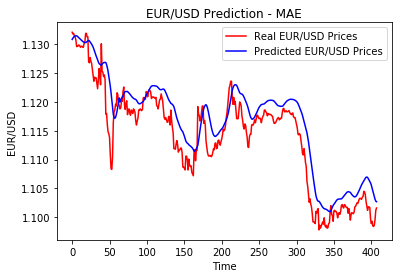

In [26]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD Prices')
plt.title('EUR/USD Prediction - MAE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [27]:
#MSE (mean squared error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

0.003773242451989476


In [28]:
#MAE (mean absolut error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

0.0030787296996397135


In [29]:
# Initialising the LSTM Model with MSE Loss Function

inputs_1_mse = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mse = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mse)
lstm_2_mse = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mse)

output_1_mse = Dense(units = 1)(lstm_2_mse)

regressor_mse = Model(inputs=inputs_1_mse, outputs = output_1_mse)

#mse -> mean squared error as loss function
regressor_mse.compile(optimizer='adam', loss = 'mse')
regressor_mse.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (64, 20, 1)               0         
_________________________________________________________________
lstm_3 (LSTM)                (64, 20, 10)              480       
_________________________________________________________________
lstm_4 (LSTM)                (64, 20, 10)              840       
_________________________________________________________________
dense_2 (Dense)              (64, 20, 1)               11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [31]:
epochs = 10
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mse.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mse.reset_states()

Epoch: 0
Epoch 1/1
4736/4736 [==============================] - 830s 175ms/step - loss: 0.0794
Epoch: 1
Epoch 1/1
4736/4736 [==============================] - 845s 178ms/step - loss: 0.0131
Epoch: 2
Epoch 1/1
4736/4736 [==============================] - 877s 185ms/step - loss: 0.0088
Epoch: 3
Epoch 1/1
4736/4736 [==============================] - 1437s 304ms/step - loss: 0.0060
Epoch: 4
Epoch 1/1
4736/4736 [==============================] - 1464s 309ms/step - loss: 0.0044
Epoch: 5
Epoch 1/1
4736/4736 [==============================] - 1359s 287ms/step - loss: 0.0036
Epoch: 6
Epoch 1/1
4736/4736 [==============================] - 809s 171ms/step - loss: 0.0033
Epoch: 7
Epoch 1/1
4736/4736 [==============================] - 829s 175ms/step - loss: 0.0032
Epoch: 8
Epoch 1/1
4736/4736 [==============================] - 811s 171ms/step - loss: 0.0032
Epoch: 9
Epoch 1/1
4736/4736 [==============================] - 1091s 230ms/step - loss: 0.0032


In [32]:
import h5py
regressor_mse.save(filepath="my_model_with_mse_30_ts.h5")

In [33]:
regressor_mse = load_model(filepath="my_model_with_mse_30_ts.h5")

In [34]:
predicted_bcg_values_test_mse = regressor_mse.predict(X_test, batch_size=batch_size)
regressor_mse.reset_states()

predicted_bcg_values_test_mse = np.reshape(predicted_bcg_values_test_mse, 
                                       (predicted_bcg_values_test_mse.shape[0], 
                                        predicted_bcg_values_test_mse.shape[1]))
predicted_bcg_values_test_mse = sc.inverse_transform(predicted_bcg_values_test_mse)

pred_mse = []

for j in range(0, testset_length - timesteps):
    pred_mse = np.append(pred_mse, predicted_bcg_values_test_mse[j, timesteps-1])

pred_mse = np.reshape(pred_mse, (pred_mse.shape[0], 1))

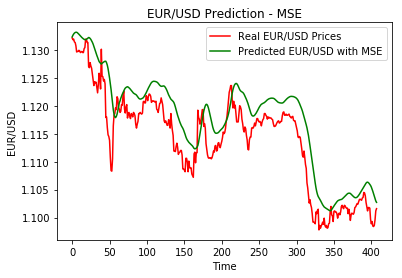

In [35]:
# Visualising the results
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.title('EUR/USD Prediction - MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps]))
print(rmse)

0.00463306303173324


In [37]:
mean = np.mean(np.float64(test_set[timesteps:len(pred_mse)]))
print(mean)

1.1140482843137256


In [38]:
rmse/mean * 100

0.41587632214588366

In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps])
print(mae)

0.003923319837158803


In [40]:
mae/mean * 100

0.3521678451823693

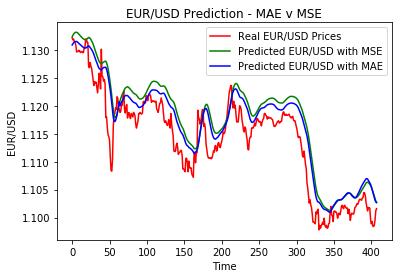

In [41]:
import matplotlib.pyplot as plt
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD with MAE')
plt.title('EUR/USD Prediction - MAE v MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()